# Problem Statement

# Title: Predicting Sales Based on Advertising Spend

# Background:
In today's competitive market, companies are constantly looking for ways to optimize their advertising budgets to maximize sales. Understanding the relationship between advertising expenditure across various media channels and sales performance is crucial for making informed marketing decisions. This dataset contains data on advertising expenditures across three channels: TV, Radio, and Newspaper, along with the resulting sales figures.

# Objective:
The objective of this analysis is to build a predictive model that can accurately forecast sales based on the amount of money spent on TV, Radio, and Newspaper advertisements. This model will help in understanding the impact of each advertising channel on sales and in making strategic decisions regarding budget allocation to maximize sales.

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Explore the dataset

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# check null values 

In [9]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


#  Exploratory Data Analysis

# Univariate Analysis

<Axes: xlabel='TV', ylabel='Count'>

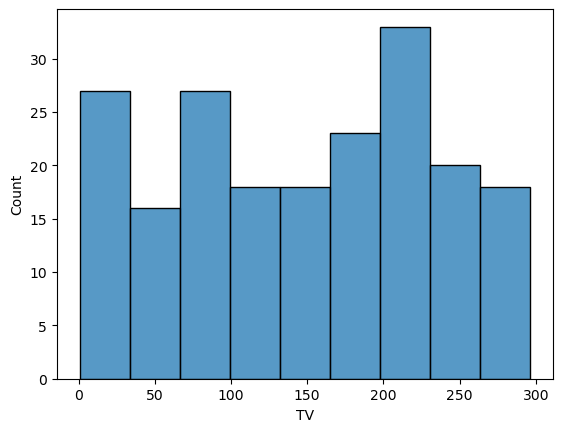

In [11]:
sns.histplot(data=df,x='TV')

<Axes: xlabel='Radio', ylabel='Count'>

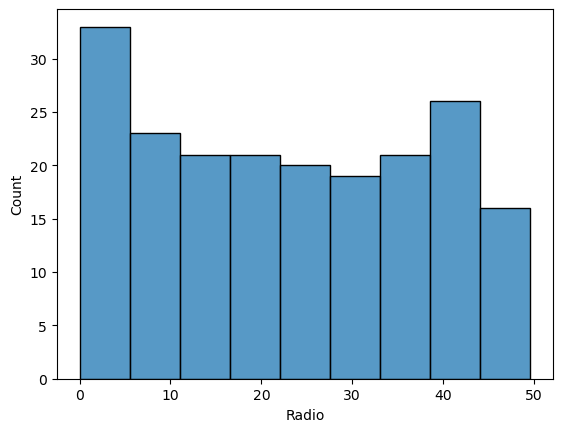

In [15]:
sns.histplot(data=df,x='Radio')

<Axes: xlabel='Newspaper', ylabel='Density'>

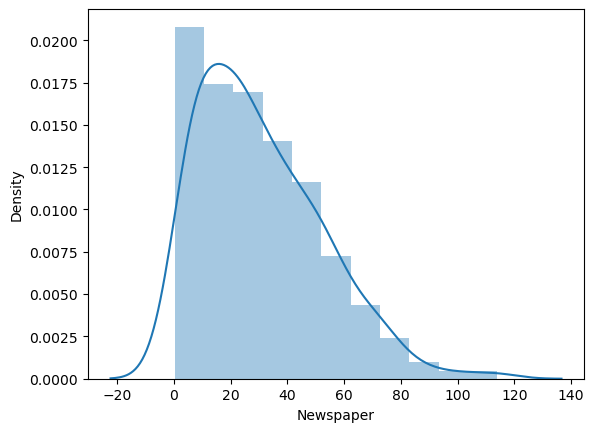

In [16]:
sns.distplot(df['Newspaper'])

<Axes: xlabel='Sales', ylabel='Density'>

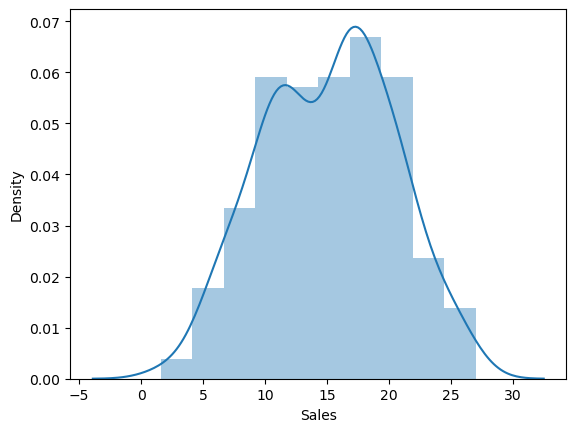

In [19]:
sns.distplot(df['Sales'])

# Bivariate Analysis

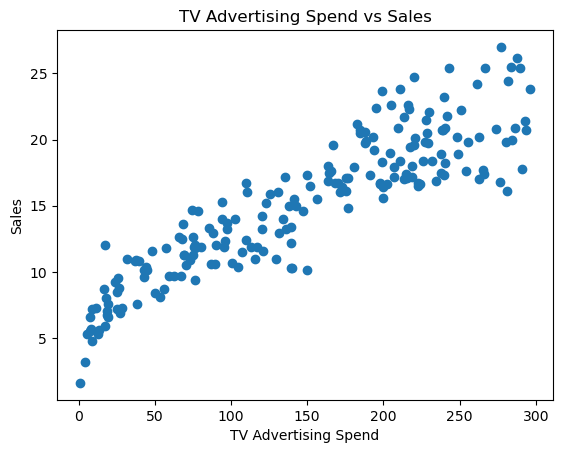

In [18]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('TV Advertising Spend vs Sales')
plt.show()

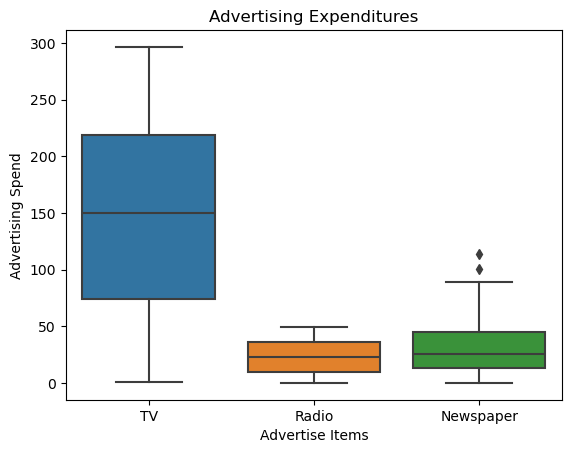

In [20]:
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title('Advertising Expenditures')
plt.xlabel('Advertise Items')
plt.ylabel('Advertising Spend')
plt.show()

In [21]:
#Correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Data Preprocessing

# Split the Data into Training and Testing Sets

In [22]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


# Model Building

# Linear Regression

In [33]:
l = LinearRegression()

In [36]:
l.fit(X_train,y_train)

LinearRegression()

In [38]:
l.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [40]:
l.intercept_

4.714126402214134

In [43]:
y_pred = l.predict(X_test)

In [44]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

# MSE

In [45]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error (MSE):",mse)

Mean Squared Error (MSE): 2.9077569102710923


# R2S

In [46]:
r2s=r2_score(y_test,y_pred)
print("R-Squared Score (R2S):",r2s)

R-Squared Score (R2S): 0.9059011844150826


# Predict Sales for New Advertising Expenditures

In [48]:
a_X = [[100, 50, 25]]
print('Predicted Sales:',l.predict(a_X))

Predicted Sales: [15.32073778]


# Visualization For Regression Model

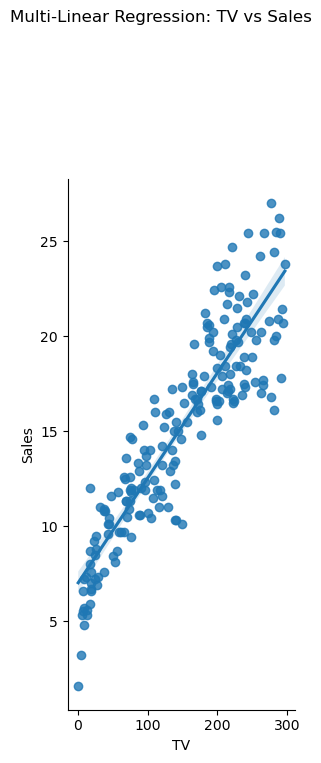

In [49]:
sns.pairplot(df, x_vars=['TV'], y_vars='Sales', height=6, aspect=0.5, kind='reg')
plt.suptitle('Multi-Linear Regression: TV vs Sales', y=1.26)
plt.show()

# Conclusion
This project exclusively utilized linear regression to forecast sales based on advertising expenditure. Despite its straightforward approach, the model provided meaningful insights into the connection between advertising investment and sales performance. Notably, the analysis underscored a positive correlation between advertising spend and sales figures, particularly emphasizing the significant impact of TV advertising.